In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00


In [ ]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [ ]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [ ]:
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)

unzip(zip_file='trash_inst_material.zip')

Extracted all


In [ ]:
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',

    'names': {
        0: 'rov',
        1: 'plant',
        2: 'animal_fish',
        3: 'animal_starfish',
        4: 'animal_shells',
        5: 'animal_crab',
        6: 'animal_eel',
        7: 'animal_etc',
        8: 'trash_etc',
        9: 'trash_fabric',
        10: 'trash_fishing_gear',
        11: 'trash_metal',
        12: 'trash_paper',
        13: 'trash_plastic',
        14: 'trash_rubber',
        15: 'trash_wood',
    }
}

In [ ]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

In [ ]:
EPOCHS = 5
!yolo \
task=segment \
mode=train \
model=yolov8n-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8n-seg \
exist_ok=True \
amp=False

        1/5         0G      1.213      2.538      3.309      1.245         56        640: 100% 355/355 [1:51:35<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 36/36 [05:38<00:00,  9.41s/it]
                   all       1149       2419      0.432      0.187      0.122     0.0742       0.43      0.182       0.12     0.0625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
        2/5         0G       1.16      2.175      2.408      1.208         52        640: 100% 355/355 [1:47:55<00:00, 18.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 36/36 [05:33<00:00,  9.26s/it]
                   all       1149       2419      0.413      0.262      0.202      0.133      0.418      0.248        0.2      0.108

      Epoch    GPU_mem   box_loss   seg_los

In [ ]:
EPOCHS = 5
!yolo \
task=detect \
mode=train \
model=yolov8m-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8m-seg \
exist_ok=True \
amp=False

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.38 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=trashcan_inst_material.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [ ]:
# Download the inference data.
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)

unzip(zip_file='trash_segment_inference_data.zip')

Extracted all


In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.1.38 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-seg summary (fused): 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs

image 1/1204 /content/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 (no detections), 1194.3ms
image 2/1204 /content/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 (no detections), 1069.6ms
image 3/1204 /content/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 (no detections), 1482.4ms
image 4/1204 /content/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 (no detections), 1655.3ms
image 5/1204 /content/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 (no detections), 1067.4ms
image 6/1204 /content/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 (no detections), 1079.7ms
image 7/1204 /content/trash_inst_material/val/images/vid_000002_frame0000019.jpg: 384x640 (no detections), 1060.2ms
image 8/1204 /c

In [ ]:
visualize('runs/segment/yolov8m_predict')

Visualizing segment: runs/segment/yolov8m_predict_23_92


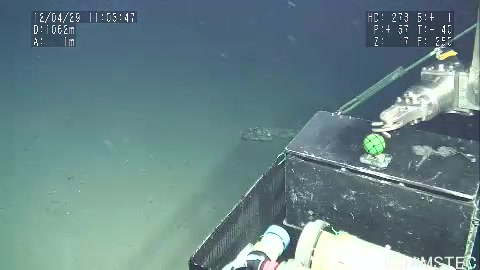

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# path
path = r'/content/trash_inst_material/val/images/vid_000168_frame0000014.jpg'

# Reading an image in default mode
image = cv2.imread(path)

# Window name in which image is displayed
window_name = 'image'

# Using cv2.imshow() method
# Displaying the image
cv2_imshow(image)

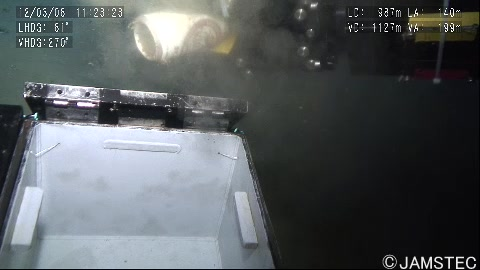

In [ ]:
path=r"/content/trash_inst_material/val/images/vid_000145_frame0000077.jpg"
image2 = cv2.imread(path)
cv2_imshow(image2)

In [ ]:
!yolo predict \
model='runs/segment/yolov8m-seg.pt' \
source='trash_segment_inference_data/manythings.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True